In [13]:
import csv
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import choice

from io import StringIO

length = 200

In [14]:
char_to_index_map = {
    'a': 0,
    'b': 1,
    'c': 2,
    'd': 3,
    'e': 4,
    'f': 5,
    'g': 6,
    'h': 7,
    'i': 8,
    'j': 9,
    'k': 10,
    'l': 11,
    'm': 12,
    'n': 13,
    'o': 14,
    'p': 15,
    'q': 16,
    'r': 17,
    's': 18,
    't': 19,
    'u': 20,
    'v': 21,
    'w': 22,
    'x': 23,
    'y': 24,
    'z': 25,
    ',': 26,
    '_': 27,
    '?': 28,
    """'""": 29,
    '\\': 30,
    '/': 31,
}

index_to_char_map = {
    0: 'a',
    1: 'b',
    2: 'c',
    3: 'd',
    4: 'e',
    5: 'f',
    6: 'g',
    7: 'h',
    8: 'i',
    9: 'j',
    10: 'k',
    11: 'l',
    12: 'm',
    13: 'n',
    14: 'o',
    15: 'p',
    16: 'q',
    17: 'r',
    18: 's',
    19: 't',
    20: 'u',
    21: 'v',
    22: 'w',
    23: 'x',
    24: 'y',
    25: 'z',
    26: ',',
    27: '_',
    28: '?',
    29: """'""",
    30: '\\',
    31: '/',
}

base_array = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0
                       ])


In [15]:
def load_lyrics():
    lyrics = ''
    data = open('lyric2.txt', 'r')
    for i in data:
    	lyrics += i
    return lyrics

def print_lyrics(data):
    for value in data:
        print(value)

def convert_char_to_array(character):
    result = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0
                      ])
    index = char_to_index_map[character]
    result[index] = 1
    return result

def generate_input_data(all_chars):
    input_data = []
    for character in all_chars:
        new_array = convert_char_to_array(character)
        input_data.append(new_array)
    return input_data

def generate_teacher_data(all_chars):
    output_data = convert_char_to_array(all_chars[1])
    for character in all_chars[2:len(all_chars)]:
        new_array = convert_char_to_array(character)
        output_data = np.vstack((output_data, new_array))
    output_data = np.vstack((output_data, base_array))
    return output_data

def generate_data(all_chars):
    input_data = generate_input_data(all_chars)
    print('Input data generated.')
    teacher_data = generate_teacher_data(all_chars)
    print('Teacher data generated.')

    return input_data, teacher_data

def create_vector_by_index(index):
    result = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                       0, 0, 0, 0, 0, 0, 0
                       ])
    result[index] = 1
    return result

def decrypt_output(collection_matrix):
    description = ''
    for i in range(length + 1):
        letter_vector = collection_matrix[:, i]
        letter = choose_letter(letter_vector)
        description = '{}{}'.format(description, letter)
    print(description)

def choose_letter(input_vector):
    chosen_index = np.argmax(input_vector)
    input_vector = np.array(input_vector)
    #print(input_vector.sum())
    #chosen_index = np.random.choice(32, 1, replace=False, p=input_vector)
    letter = index_to_char_map[chosen_index]
    return letter

def normalize_vector(input_vector):
    elements_sum = 0
    result_vector = np.array(input_vector)
    for i in range(input_vector.size):
        if input_vector[i] < 0:
            result_vector[i] = 0
        else:
            result_vector[i] = input_vector[i] ** 9

    sum_of_elements = result_vector.sum()
    result_vector = result_vector/result_vector.sum()
    #for i in range(result_vector.size):
    #    result_vector[i] = result_vector[i] / sum_of_elements
    #    suma += result_vector[i]
    suma=result_vector.sum()
    #print(suma)
    return result_vector

lyrics loaded
Input data generated.
Teacher data generated.
Input data and teacher data loaded ...
Spectral radius is ... 5.889965103332391
Start training ...
Training done, start Ridge Regression ...
19
Start decrypting ...
look_at_her_face,_it_en_re_athe_the_souhe_sove_you_dout_you_doul__ou_oou_and_ou__an_end__and_you_nol__he_wae__ou_dou__you_on__a_the__and_you_don__ho_se_toe_the_tou_d_love_you_he_the_way_you_lou__oou_to


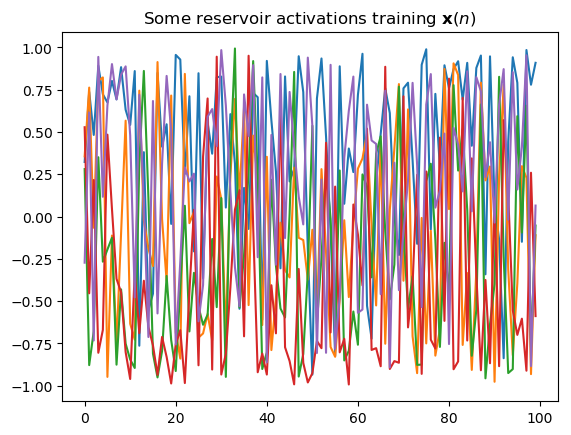

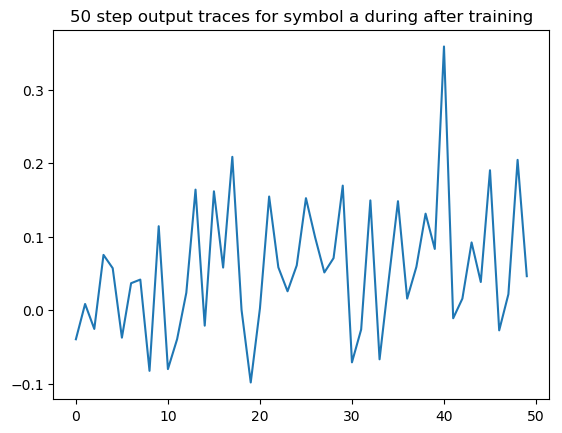

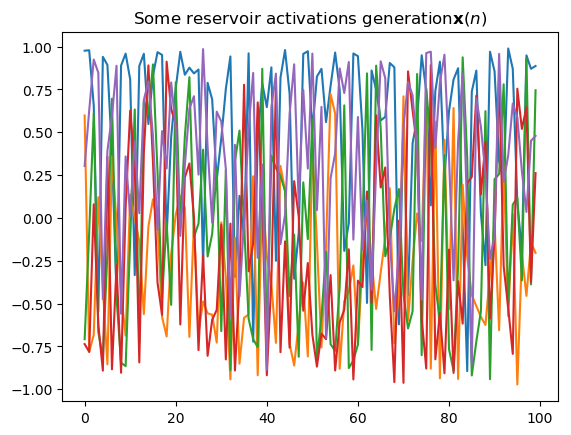

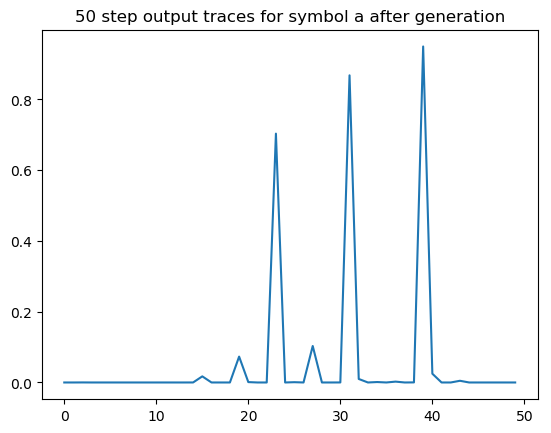

In [16]:
if __name__ == '__main__':

    all_lyrics = load_lyrics()
    print("lyrics loaded")
    #print_lyrics(all_lyrics)
    all_lyrics = all_lyrics.lower()
    input_data, teacher_data = generate_data(all_lyrics)
    print('Input data and teacher data loaded ...')

    input_units = output_units = 32
    units = 400
    np.random.seed(78)
    # Define the reservoir parameters
    defined = 0

    if defined == 0:
        Win = (np.random.rand(units, input_units) - 0.5)
        W = np.random.rand(units, units) - 0.5
        bias = np.random.rand(units, ) - 0.5
        np.savetxt('Win.txt', Win)
        np.savetxt('W.txt', W)
        np.savetxt('bias.txt', bias)
    read = 0
    if read == 1:
        Win = np.genfromtxt('Win.txt')
        W = np.genfromtxt('W.txt')
        bias = np.genfromtxt('bias.txt')

    spectral_radius = np.max(np.abs(np.linalg.eig(W)[0]))
    print('Spectral radius is ...', spectral_radius)
    W *= 1 / spectral_radius

    winsf = 1.6
    wsf = 1.4
    bsf = 0.9
    alpha = 0.005
    
    W = np.multiply(W, wsf)
    Win = np.multiply(Win, winsf)
    bias = np.multiply(bias, bsf)

    train_len = len(input_data)

    # Data collection matrix
    # State collection matrix
    X = np.zeros((input_units + units, train_len), dtype=np.float32)
    x = np.zeros((units, ), dtype=np.float32)

    print('Start training ...')
    # Training phase
    for j in range(train_len):
        u = input_data[j]
        x = np.tanh(np.dot(W, x) + np.dot(Win, u) + bias)
        # print('x shape', x.shape)
        # print(x)

        collection_vector = np.vstack((u[:, None], x[:, None]))
        X[:, j] = collection_vector[:, 0]

    print('Training done, start Ridge Regression ...')
    # Use Ridge regression to train the output matrix
    Wout = np.dot(np.divide(np.dot(teacher_data.T, X.T),train_len), np.linalg.inv(np.divide(np.dot(X, X.T), train_len) + alpha*np.eye(units + input_units)))
    
    #output after training
    Yres = np.dot(Wout, X)
    
    #GENERATION
    generating_steps = length
    norm_hypothesis_vector = np.zeros((output_units, generating_steps + 1), dtype=np.float32)
    hypothesis_vector = np.zeros((output_units, generating_steps + 1), dtype=np.float32)
    dcm_out = np.zeros((units + input_units, ), dtype=np.float32)
    X_gen = np.zeros((input_units + units, generating_steps), dtype=np.float32)
    
    #Starting the network with few good lyrics
    for s in range(20):
        norm_hypothesis_vector[:,s] = input_data[s]
        u = norm_hypothesis_vector[:, s]
        x = np.tanh(np.dot(Win, u) + np.dot(W, x) + bias)
        collection_vector = np.vstack((u[:, None], x[:, None]))
        X_gen[:,s] = collection_vector[:,0]
    
    print(s)
    # Data collection matrix
    Y = np.zeros((output_units, generating_steps))
    for t in range(generating_steps-19):
        u = norm_hypothesis_vector[:, s+t]
        x = np.tanh(np.dot(Win, u) + np.dot(W, x) + bias)

        collection_vector = np.vstack((u[:, None], x[:, None]))
        X_gen[:,s+t] = collection_vector[:, 0]
        y = np.dot(Wout, collection_vector[:, 0])
        #hypothesis_vector[:, s+t+1] = y
        #X_gen[:, j] = collection_vector[:, 0]
        norm_hypothesis_vector[:, s+t+1] = normalize_vector(y)

    print('Start decrypting ...')
    decrypt_output(norm_hypothesis_vector)

  


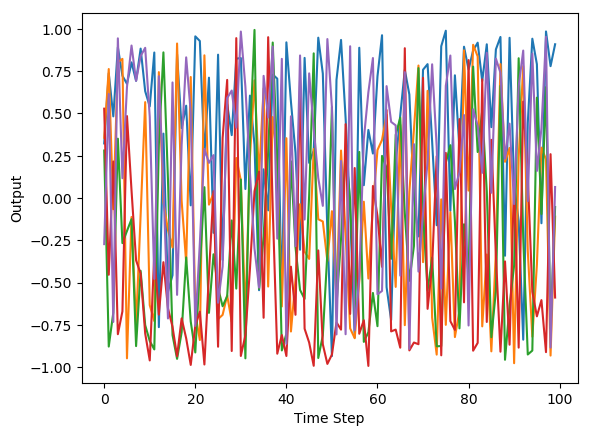

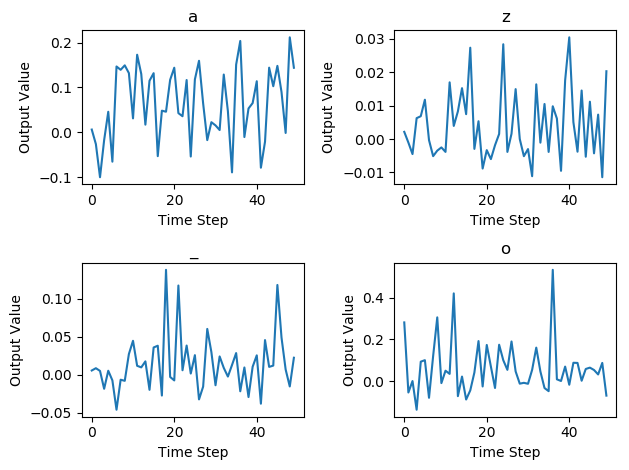

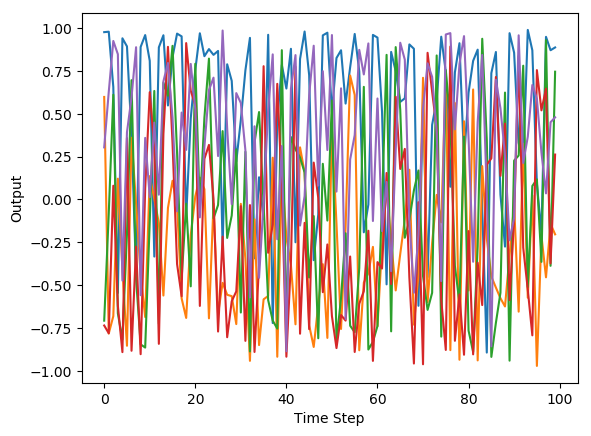

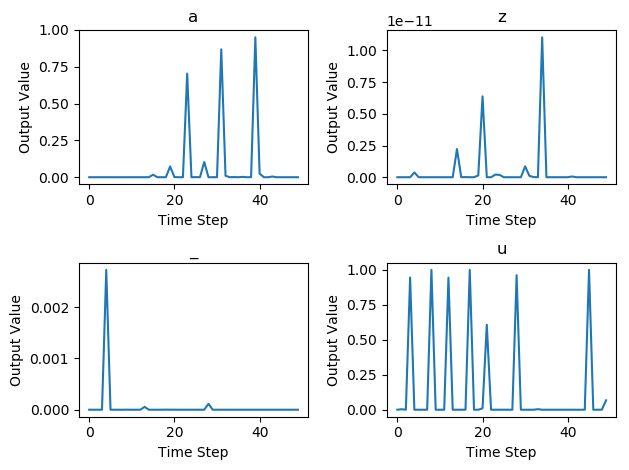

In [33]:
    plt.figure(1).clear()
    plt.plot( X[43:48,0:100].T )
    plt.xlabel('Time Step')
    plt.ylabel('Output')
    
    plt.figure(2).clear()
    plt.subplot(2,2,1)
    plt.plot( Yres[0, 0:50])
    plt.xlabel('Time Step')
    plt.ylabel('Output Value')
    plt.title('a')
    
    plt.subplot(2,2,2)
    plt.plot( Yres[25, 0:50])
    plt.xlabel('Time Step')
    plt.ylabel('Output Value')
    plt.title('z')
    
    plt.subplot(2,2,3)
    plt.plot( Yres[29, 0:50])
    plt.xlabel('Time Step')
    plt.ylabel('Output Value')
    plt.title('_')
    
    plt.subplot(2,2,4)
    plt.plot( Yres[14, 0:50])
    plt.xlabel('Time Step')
    plt.ylabel('Output Value')
    plt.title('o')
    plt.tight_layout()
    
    plt.figure(3).clear()
    plt.plot( X_gen[43:48,100:200].T )
    plt.xlabel('Time Step')
    plt.ylabel('Output')
    
    plt.figure(4).clear()
    plt.subplot(2,2,1)
    plt.plot( norm_hypothesis_vector[0, 50:100])
    plt.xlabel('Time Step')
    plt.ylabel('Output Value')
    plt.title('a')
    
    plt.subplot(2,2,2)
    plt.plot( norm_hypothesis_vector[25, 50:100])
    plt.xlabel('Time Step')
    plt.ylabel('Output Value')
    plt.title('z')
    
    plt.subplot(2,2,3)
    plt.plot( norm_hypothesis_vector[29, 50:100])
    plt.xlabel('Time Step')
    plt.ylabel('Output Value')
    plt.title('_')
    
    plt.subplot(2,2,4)
    plt.plot( norm_hypothesis_vector[20, 50:100])
    plt.xlabel('Time Step')
    plt.ylabel('Output Value')
    plt.title('u')
    plt.tight_layout()

    plt.show()
